In [1]:
words = open("names.txt","r").read().splitlines()

In [2]:
words[0:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

### Bigram Language Model

In [3]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs,chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [4]:
sorted(b.items(), key=lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [6]:
import torch

In [39]:
N = torch.zeros((27,27) , dtype=torch.int32)

In [33]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0

In [35]:
itos = {i:s for s,i in stoi.items()}

In [112]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs,chs[1:]):
        bigram = (ch1, ch2)
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1,ix2] += 1

In [109]:
import matplotlib.pyplot as plt

In [110]:
import numpy

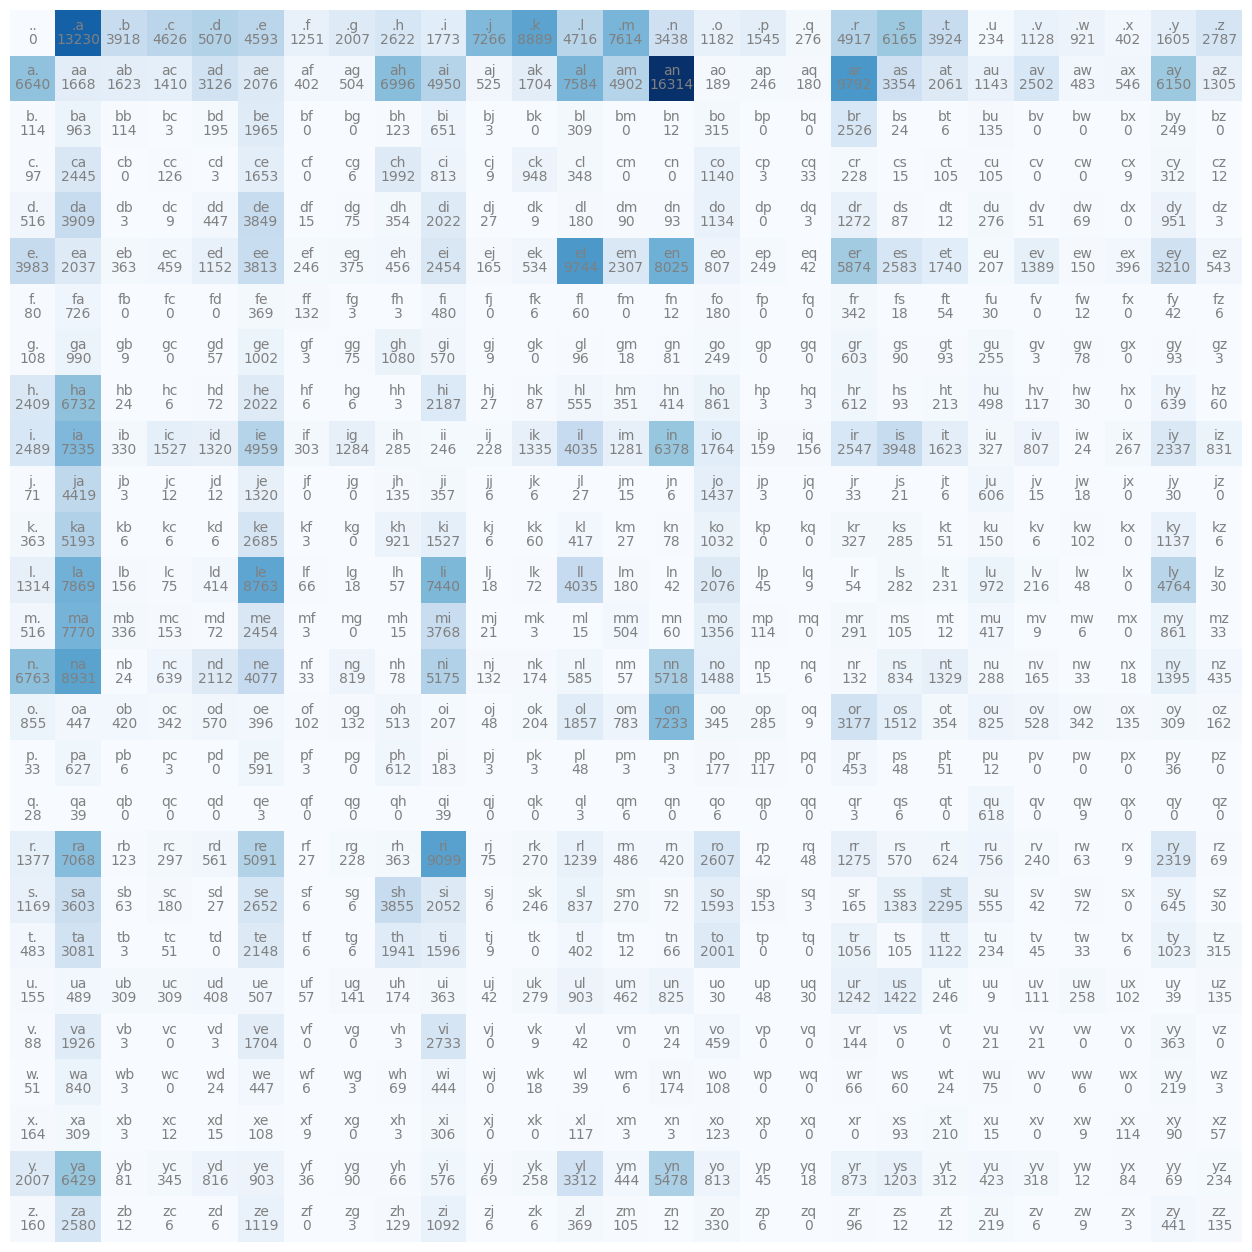

In [113]:
%matplotlib inline

plt.figure(figsize=(16,16))

plt.imshow(N,cmap='Blues')

for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j, i, N[i,j].item(), ha="center", va="top", color="gray")
plt.axis("off");

In [114]:
N[0]

tensor([    0, 13230,  3918,  4626,  5070,  4593,  1251,  2007,  2622,  1773,
         7266,  8889,  4716,  7614,  3438,  1182,  1545,   276,  4917,  6165,
         3924,   234,  1128,   921,   402,  1605,  2787], dtype=torch.int32)

In [118]:
# Converting to probability vector
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [119]:
# g = torch.Generator().manual_seed(2147483647)
# p = torch.rand(3, generator=g)
# p = p / p.sum()
# p
# torch.multinomial(p, num_samples=20, replacement=True, generator=g)

In [120]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
ix,itos[ix]

(3, 'c')

In [128]:
for i in range(10):
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    print(ix)

10
13
4
3
11
10
11
10
11
23


In [91]:
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [133]:
g = torch.Generator().manual_seed(2147483647)

for i in range(10):
    ix = 0
    name = []
    while True:
        p = N[ix].float()
        #import pdb;pdb.set_trace()
        p = p / p.sum()
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        name.append(itos[ix])
        if ix == 0:
            break
    print(''.join(name))


cexze.
momasurailezitynnelllimittainellayn.
kanar.
staiyaubrtthrigotai.
moliellavo.
ke.
tedaren.
emimmsadey.
nkaviynylytlspihinivenvorhlasu.
dsordeleenleryawaisana.


In [139]:
# Optimize the probability computation
P = N.float()
P /= P.sum(1, keepdim=True)

In [140]:
P[0].sum()

tensor(1.)

In [141]:
g = torch.Generator().manual_seed(2147483647)

for i in range(10):
    ix = 0
    name = []
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        name.append(itos[ix])
        if ix == 0:
            break
    print(''.join(name))


cexze.
momasurailezitynnelllimittainellayn.
kanar.
staiyaubrtthrigotai.
moliellavo.
ke.
tedaren.
emimmsadey.
nkaviynylytlspihinivenvorhlasu.
dsordeleenleryawaisana.
